# Aprendizado de Máquina - 2021.2
  * Prof. Ana Luiza Bessa de Paula Barros
  * Programa de Pós-graduação em Ciência da Computacão - PPGCC/UECE
## Atividade 2  PCA (Principal Component Analysis)
  * Domingos Bruno Sousa Santos

## Roteiro
 * 1) PCA com sklearn
 * 2) PCA com Numpy e decomposição espectral da matriz de covariância
 * 3) PCA com Numpy e SVD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import cv2
from sklearn.datasets import load_digits
plt.style.use('seaborn')

### Leituda as imagens

In [2]:
# Leitura dos dados .CSV
df_data = pd.read_csv("sign_mnist_train.csv")
df_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [3]:
# Removendo a coluna das classes do data frame
del df_data['label']

# Juntando os dados de teste de treinamneto
# Normalizado os valores de pixels para ficar em uma escla entre 0 e 1
X_data = df_data.values/255
X_data = X_data[:100]
    

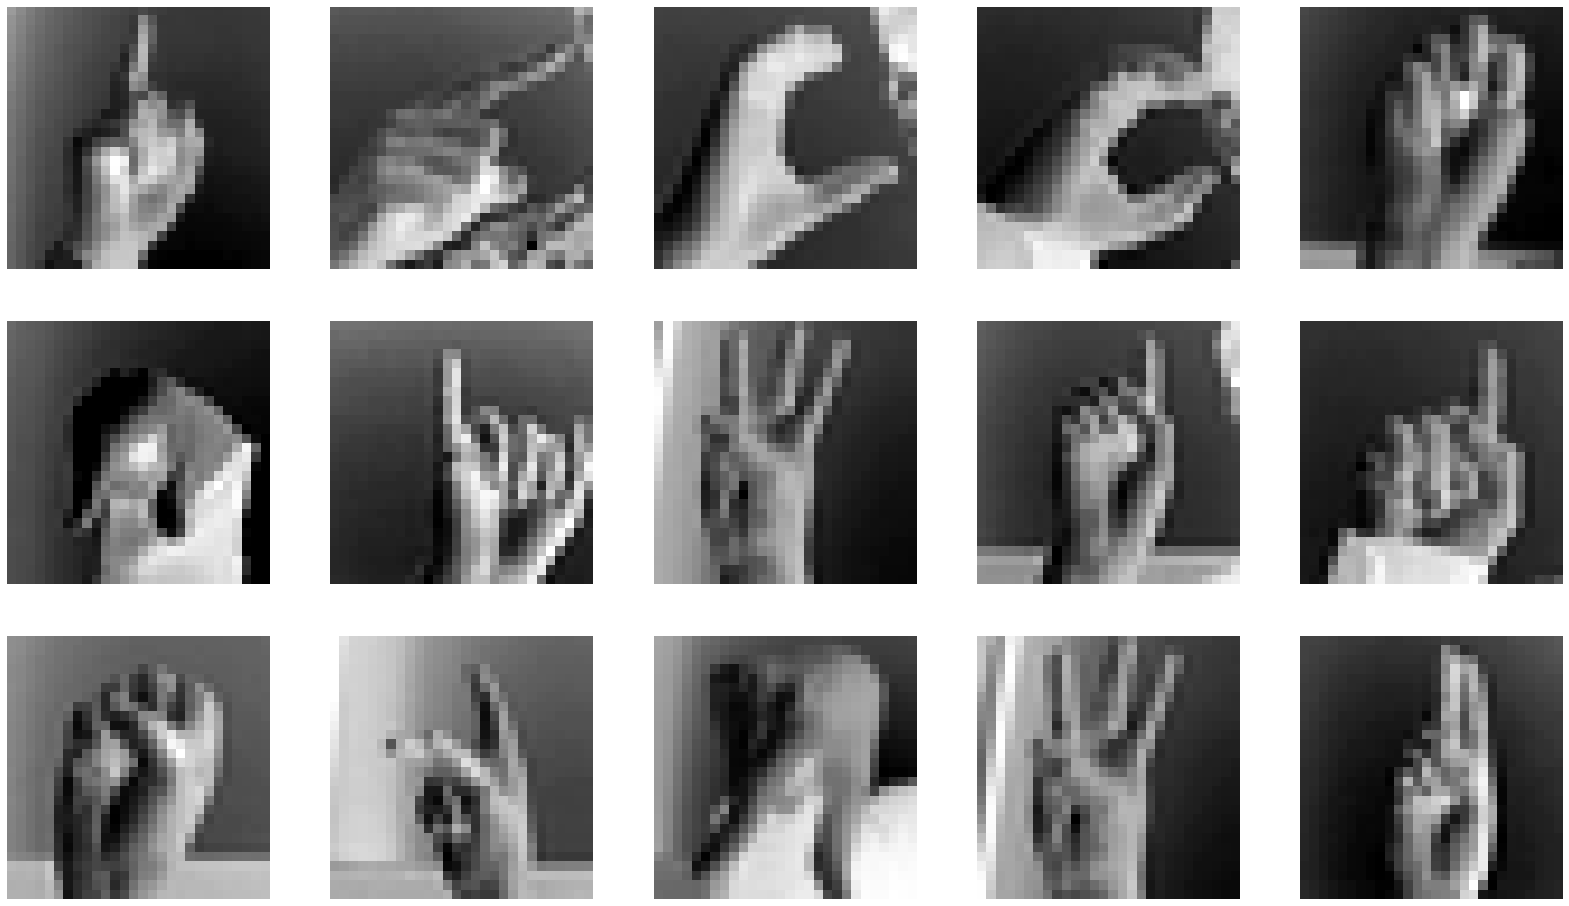

In [4]:
plt.figure(figsize=(28,28))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = X_data[i].reshape(28, 28)
    plt.imshow(img, cmap=plt.cm.binary)
    
plt.show()

## 1) PCA com sklearn

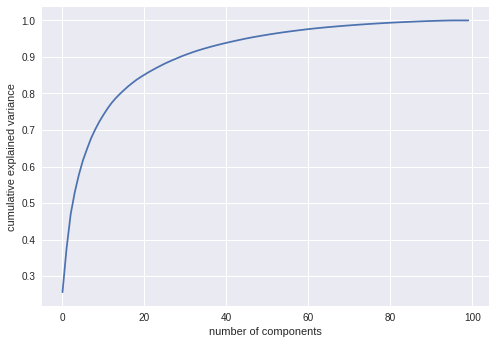

In [5]:
# Variância explicada de acordo com a quantidade de autovetores
pca = PCA().fit(X_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [6]:
#  94.65% da variância nos dados é explicada pelo primeiro componente principal
np.cumsum(pca.explained_variance_ratio_)

array([0.25590146, 0.3764171 , 0.46968833, 0.52985602, 0.57767286,
       0.61730569, 0.64857443, 0.67802495, 0.70189852, 0.72320186,
       0.74163733, 0.75897964, 0.77429638, 0.78721974, 0.79873349,
       0.80921212, 0.81933975, 0.82837527, 0.83700452, 0.84445654,
       0.85134185, 0.85813171, 0.86441441, 0.87058488, 0.87627782,
       0.8819564 , 0.88710442, 0.89198246, 0.89673836, 0.90143958,
       0.90575437, 0.90990844, 0.91382013, 0.91750344, 0.92093762,
       0.92418151, 0.92735512, 0.93040945, 0.93325753, 0.93603385,
       0.9386623 , 0.94124015, 0.94373495, 0.94616214, 0.94857093,
       0.95091348, 0.9530668 , 0.95510038, 0.95706114, 0.9589739 ,
       0.96082571, 0.96260545, 0.96435063, 0.96605088, 0.96761758,
       0.96918068, 0.97065942, 0.97208067, 0.9734728 , 0.97484966,
       0.976186  , 0.97741246, 0.97857142, 0.97969397, 0.98075635,
       0.98179965, 0.98275775, 0.98370917, 0.98463906, 0.9855452 ,
       0.98641968, 0.98727799, 0.98808497, 0.98888188, 0.98963

In [7]:
# Fazendo a redução da dimensionalidade
k = 56 # 
pca = PCA(n_components=k)
pca_1 = pca.fit_transform(X_data)
print(pca_1.shape)
print("")
print(pca_1[:20])

(100, 56)

[[-3.82047736e-01 -1.27573270e+00 -1.28333889e+00 ... -3.02251484e-02
   1.01596274e-01 -2.13495169e-01]
 [-1.10245926e+00 -8.98956824e-02  7.87197941e-01 ...  2.37206100e-01
  -3.88292973e-02 -5.52871089e-03]
 [ 8.39336694e-01 -3.41064603e+00  1.83797463e+00 ... -1.23041759e-02
   3.15850004e-01 -1.15884818e-01]
 ...
 [ 3.41223602e+00  2.08333353e+00  2.51794125e-01 ... -6.49737265e-02
  -8.48364157e-02 -2.56776144e-03]
 [ 4.31749909e+00  9.97636339e-01  1.00874721e-02 ... -3.68155592e-02
  -8.73868135e-02 -1.42326056e-02]
 [ 2.42203699e+00 -2.26862202e-01 -3.99377856e-01 ... -1.56454113e-01
   5.09530975e-03 -2.63536142e-01]]


## 2) PCA com Numpy e decomposição espectral da matriz de covariância

### Centralizar a matriz de dados original $\tilde{X}$ obtendo a matriz $X$.
Centralizar a matriz de dados original obtendo a matriz X.
A centralização de dados caracteriza-se pela subtração dos dados amostrais de cada variável, da sua média amostral.
\begin{equation}
X = \tilde{X} - \mu 
\end{equation}

In [8]:
# Centralizando a matriz de dados
X_data_cet = np.array(X_data)
mean_x = np.mean(X_data_cet, axis=0)
X_data_cet = X_data_cet - mean_x
print(X_data_cet.shape)
print(mean_x.shape)
print(X_data_cet.shape)

(100, 784)
(784,)
(100, 784)


### Calcular a matriz de covariância dos dados treinamento de duas maneiras:
   
* 1) Utilizado base de dados original $\tilde{X}$ (não centralizada):
\begin{align} np.cov(\tilde{X}) \end{align}


In [9]:
# Calculando a matriz de covariância
cov_mat_X = np.cov(X_data, rowvar=False)
print(cov_mat_X.shape)
# Imprimido os primeiros valores
print(cov_mat_X[:2])

(784, 784)
[[0.02688803 0.02537551 0.02367885 ... 0.00717625 0.00815968 0.00776793]
 [0.02537551 0.02510102 0.02327994 ... 0.00593291 0.00691252 0.0065909 ]]


### Calcular a decomposição espectral da matriz de covariância dos dados, isto é, $cov(X) = QΛQ^T$, usando a função do NumPy:

\begin{equation}
 cov(X) = QΛQ^T
\end{equation}

\begin{equation}
 w, Q =  np.linalg.eigh(cov(X))
\end{equation}

* $w$ trata-se dos autovalores
* $Q$ trata-se dos autovetores

obtendo-se os autovalores w e seus autovetores associados nas colunas de Q.
Atenção: os autovalores (e seus autovetores associados) devem ser ordenados em ordem decrescente.

In [10]:
cov = np.cov(X_data_cet.T) / X_data_cet.shape[0] # Get covariance matrix

In [11]:
# Calcular a decomposição espectral 
w, Q = np.linalg.eigh(cov)
print(w.shape)
print(Q.shape)
print(w[:20])
print(Q[:20])

(784,)
(784, 784)
[-1.04561212e-17 -7.72729184e-18 -7.53581839e-18 -6.20333060e-18
 -5.36951791e-18 -4.45346425e-18 -4.19317956e-18 -3.95238021e-18
 -3.69474557e-18 -3.36610803e-18 -3.30833723e-18 -3.24446303e-18
 -2.80920667e-18 -2.42470275e-18 -1.99351330e-18 -1.99217684e-18
 -1.93875415e-18 -1.92744962e-18 -1.90854192e-18 -1.87764617e-18]
[[ 9.39394090e-14  2.67601889e-14  4.79776707e-14 ... -5.61887162e-02
   9.41906642e-04 -4.82084617e-02]
 [ 5.39564737e-01  2.25478190e-01  1.75788878e-01 ... -5.51079324e-02
  -3.02131599e-04 -4.57744052e-02]
 [ 3.16457994e-01 -5.12715511e-01  2.08838546e-01 ... -4.89522770e-02
   8.48399789e-04 -4.38993653e-02]
 ...
 [-1.04975536e-02  9.20960459e-03 -1.43482592e-02 ... -7.49415370e-03
  -1.42795713e-02 -2.63419719e-02]
 [ 2.99010716e-02  8.16296878e-03 -7.41732935e-03 ... -5.61939274e-03
  -1.40704000e-02 -2.64475325e-02]
 [-3.01647472e-02  2.23046274e-03  6.68735219e-03 ... -3.25654354e-03
  -1.30254823e-02 -2.59378674e-02]]


In [12]:
print(w.shape)
print(Q.shape)

(784,)
(784, 784)


In [13]:
# Ordenando os autovalores de forma decrescentes
index = np.argsort(w)[::-1] #Obter índices para ordenação decrescente dos autovalores
w_ord = w[index]

# Ordenando os autovetores de forma decrescentes
Q_ord = Q[:,index]

print(Q_ord[:20])
print(w_ord[:20])

[[-4.82084617e-02  9.41906642e-04 -5.61887162e-02 ...  4.79776707e-14
   2.67601889e-14  9.39394090e-14]
 [-4.57744052e-02 -3.02131599e-04 -5.51079324e-02 ...  1.75788878e-01
   2.25478190e-01  5.39564737e-01]
 [-4.38993653e-02  8.48399789e-04 -4.89522770e-02 ...  2.08838546e-01
  -5.12715511e-01  3.16457994e-01]
 ...
 [-2.63419719e-02 -1.42795713e-02 -7.49415370e-03 ... -1.43482592e-02
   9.20960459e-03 -1.04975536e-02]
 [-2.64475325e-02 -1.40704000e-02 -5.61939274e-03 ... -7.41732935e-03
   8.16296878e-03  2.99010716e-02]
 [-2.59378674e-02 -1.30254823e-02 -3.25654354e-03 ...  6.68735219e-03
   2.23046274e-03 -3.01647472e-02]]
[0.06843784 0.0322305  0.0249443  0.01609114 0.01278806 0.01059933
 0.00836246 0.0078762  0.00638471 0.00569733 0.00493035 0.004638
 0.00409628 0.0034562  0.00307922 0.00280239 0.00270852 0.00241644
 0.00230779 0.00199296]


Nota: O objetivo do PCA é construir um novo espaço de recursos. Os autovetores são os eixos desse novo espaço de recursos e os autovalores denotam a magnitude da variância ao longo desse eixo. Em outras palavras, um autovalor mais alto significa mais variância no eixo principal correspondente. Portanto, o conjunto de eixos com as variâncias mais altas são os recursos mais importantes neste novo espaço de recursos, pois eles contêm a maioria das informações. Obtendo as primeiras K colunas da matriz de autovetores, que têm os K maiores autovalores, formamos o que é chamado de matriz de projeção. O produto escalar de nossa matriz de dados e matriz de projeção, o que parece muito legal, mas na verdade é muito simples, é o espaço reduzido de recursos, o resultado do PCA.

In [14]:
# Ralizando a redução de dimensionalidade PCA
pca_2 = np.dot(X_data_cet, Q_ord[:, :k])
print(pca_2.shape)
print(pca_2[:20])

(100, 56)
[[ 0.38204774  1.2757327   1.28333889 ... -0.05818184  0.25420367
  -0.08888482]
 [ 1.10245926  0.08989568 -0.78719794 ...  0.22417141 -0.03196828
   0.0194932 ]
 [-0.83933669  3.41064603 -1.83797463 ... -0.00882328  0.11085038
  -0.30734832]
 ...
 [-3.41223602 -2.08333353 -0.25179412 ... -0.06750843 -0.00773523
   0.08192303]
 [-4.31749909 -0.99763634 -0.01008747 ... -0.03333808 -0.00647676
   0.09692989]
 [-2.42203699  0.2268622   0.39937786 ... -0.14919296  0.26263224
   0.01966261]]


In [15]:
# Calculando a Variância explicada de acordo com a quantidade de autovetores
variance_explained = []
for i in w_ord:
     variance_explained.append((i/sum(w_ord))*100)

print(variance_explained[:20])
print("")
## Identificação de componentes que explicam pelo menos 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained[:20])

[25.590145826915883, 12.051564418709933, 9.327122280353983, 6.016769078272018, 4.781684786769851, 3.963282478113884, 3.126874227473685, 2.9450517621848205, 2.3873570184286055, 2.1303342828221603, 1.8435466221874635, 1.7342309952841615, 1.531674128010698, 1.2923360837204987, 1.151374946542343, 1.0478627120838528, 1.0127637612703666, 0.9035519997949406, 0.8629249304388896, 0.7452020976716356]

[25.59014583 37.64171025 46.96883253 52.9856016  57.76728639 61.73056887
 64.8574431  67.80249486 70.18985188 72.32018616 74.16373278 75.89796378
 77.42963791 78.72197399 79.87334894 80.92121165 81.93397541 82.83752741
 83.70045234 84.44565444]


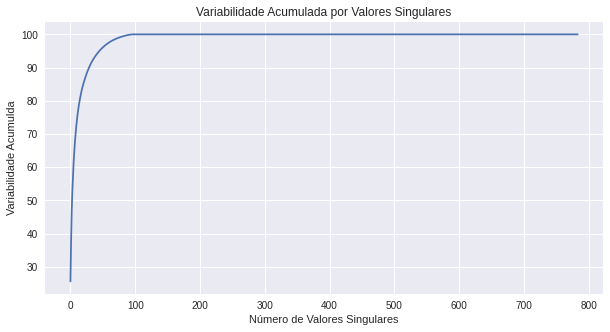

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance_explained)
plt.title('Variabilidade Acumulada por Valores Singulares')
plt.xlabel("Número de Valores Singulares")
plt.ylabel("Variabilidade Acumulda")
plt.savefig("vari_x_singulares.png", bbox_inches='tight')
plt.show()

## 3) PCA com Numpy e SVD

In [17]:
# Calculate SVD com os dados 
U, S, Vt = np.linalg.svd(X_data_cet, full_matrices=False)
print('U: ', U.shape, 
      '\nS: ', S.shape, 
      '\nVt: ', Vt.shape)

U:  (100, 100) 
S:  (100,) 
Vt:  (100, 784)


In [18]:
X_data_cet.shape

(100, 784)

In [19]:
# Calculando a Variabilidade acumulada
varia_acum = np.cumsum(S**2) / np.sum(S**2)
print(varia_acum)

[0.25590146 0.3764171  0.46968833 0.52985602 0.57767286 0.61730569
 0.64857443 0.67802495 0.70189852 0.72320186 0.74163733 0.75897964
 0.77429638 0.78721974 0.79873349 0.80921212 0.81933975 0.82837527
 0.83700452 0.84445654 0.85134185 0.85813171 0.86441441 0.87058488
 0.87627782 0.8819564  0.88710442 0.89198246 0.89673836 0.90143958
 0.90575437 0.90990844 0.91382013 0.91750344 0.92093762 0.92418151
 0.92735512 0.93040945 0.93325753 0.93603385 0.9386623  0.94124015
 0.94373495 0.94616214 0.94857093 0.95091348 0.9530668  0.95510038
 0.95706114 0.9589739  0.96082571 0.96260545 0.96435063 0.96605088
 0.96761758 0.96918068 0.97065942 0.97208067 0.9734728  0.97484966
 0.976186   0.97741246 0.97857142 0.97969397 0.98075635 0.98179965
 0.98275775 0.98370917 0.98463906 0.9855452  0.98641968 0.98727799
 0.98808497 0.98888188 0.98963766 0.99038772 0.99109695 0.99176991
 0.99242084 0.99303908 0.99364147 0.99422362 0.99478667 0.99531993
 0.9958406  0.99633702 0.99679773 0.99725286 0.99767921 0.9980

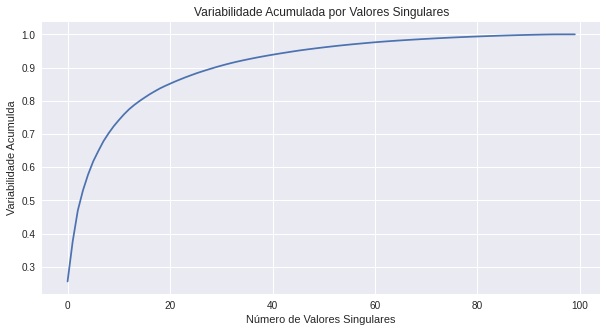

In [20]:
# Gerando um gráco de número de valores singulares versus variabilidade acumulada.
y_plot = varia_acum
x_plot = np.array(range(len(S)))

plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot)
plt.title('Variabilidade Acumulada por Valores Singulares')
plt.xlabel("Número de Valores Singulares")
plt.ylabel("Variabilidade Acumulda")
plt.savefig("vari_x_singulares.png", bbox_inches='tight')
plt.show()

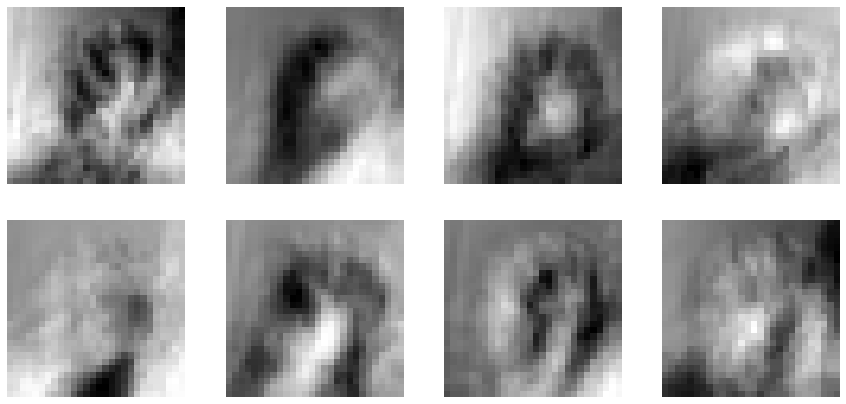

In [21]:
# A imagem original e algumas vers ̃oes com diferentes quantidades de autovetores

plt.figure(figsize=(15,15))
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = np.reshape(Vt[i], (28, 28))
    plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [22]:
n_vari_acum = 0.97 # Variabilidade acumulada esperada
r_melhores = [ n for n, i in enumerate(varia_acum) if i > n_vari_acum ][0]
print( 'Variabilidade acumulada: {:.2f}%, até o {:d}-ésimo autovalor.'.format(100 * varia_acum[r_melhores], r_melhores))

Variabilidade acumulada: 97.07%, até o 56-ésimo autovalor.


In [23]:
varia_acum[:r_melhores]

array([0.25590146, 0.3764171 , 0.46968833, 0.52985602, 0.57767286,
       0.61730569, 0.64857443, 0.67802495, 0.70189852, 0.72320186,
       0.74163733, 0.75897964, 0.77429638, 0.78721974, 0.79873349,
       0.80921212, 0.81933975, 0.82837527, 0.83700452, 0.84445654,
       0.85134185, 0.85813171, 0.86441441, 0.87058488, 0.87627782,
       0.8819564 , 0.88710442, 0.89198246, 0.89673836, 0.90143958,
       0.90575437, 0.90990844, 0.91382013, 0.91750344, 0.92093762,
       0.92418151, 0.92735512, 0.93040945, 0.93325753, 0.93603385,
       0.9386623 , 0.94124015, 0.94373495, 0.94616214, 0.94857093,
       0.95091348, 0.9530668 , 0.95510038, 0.95706114, 0.9589739 ,
       0.96082571, 0.96260545, 0.96435063, 0.96605088, 0.96761758,
       0.96918068])

In [24]:
# Ralizando a redução de dimensionalidade PCA
V_new  = Vt[:r_melhores,:].T 
pca_3 = np.dot( X_data_cet, V_new)
#X_test_new  = np.dot( X_test_cent,  V_new )

print( 'Dimensões: \nX_train: {:} --> X_train_new:  {:}'\
      .format(X_data_cet.shape, pca_3.shape) )

print( 'V:       {:} --> V_hat: {:}'\
      .format(Vt.shape, V_new.shape) )

Dimensões: 
X_train: (100, 784) --> X_train_new:  (100, 56)
V:       (100, 784) --> V_hat: (784, 56)


In [25]:
pca_3

array([[ 3.82047736e-01, -1.27573270e+00,  1.28333889e+00, ...,
         5.81818429e-02,  2.54203670e-01,  8.88848157e-02],
       [ 1.10245926e+00, -8.98956824e-02, -7.87197941e-01, ...,
        -2.24171410e-01, -3.19682765e-02, -1.94932005e-02],
       [-8.39336694e-01, -3.41064603e+00, -1.83797463e+00, ...,
         8.82328229e-03,  1.10850382e-01,  3.07348321e-01],
       ...,
       [-3.79806624e+00,  5.20366001e+00,  9.52823136e-01, ...,
        -6.92068568e-02,  6.24299674e-02,  1.53068673e-01],
       [ 2.01524399e+00,  4.63177864e-01, -2.97291546e-01, ...,
         3.92809260e-01, -3.11341384e-01,  1.53600566e-01],
       [ 1.55967073e+00, -2.16633239e+00, -1.23189912e+00, ...,
        -2.24302786e-02, -8.49897827e-02,  2.46960405e-03]])

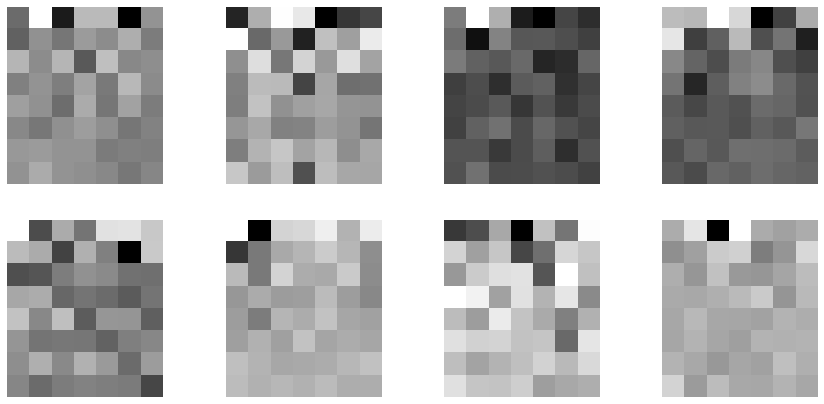

In [26]:
plt.figure(figsize=(15,15))
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    img = np.reshape(pca_3[i], (8, 7))
    plt.imshow(img, cmap=plt.cm.binary)
plt.show()